In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 데이터 준비

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()

X = iris_dataset['data']
y = iris_dataset['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [ ]:
# 모델 훈련(학습)

# iris_dataset은 species : setosa, versicolor, virginica 범주를 예측하는 분류 모델
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_train, y_train), knn_classifier.score(X_test, y_test)

(0.9732142857142857, 0.9736842105263158)

In [13]:
train_scores = []
test_scores = []
for k in np.arange(1, 10, 2): # 1, 3, 5, 7, 9
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    train_scores.append( knn_classifier.score(X_train, y_train) )
    test_scores.append( knn_classifier.score(X_test, y_test) )

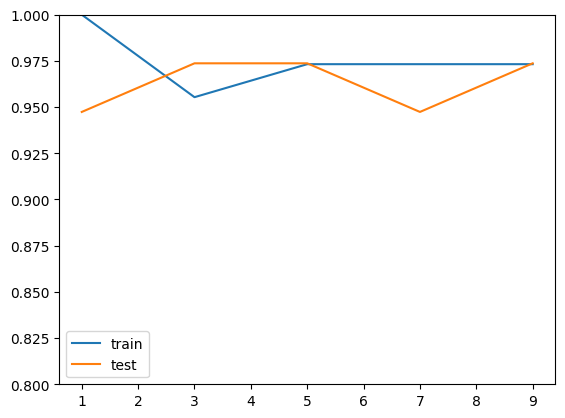

In [18]:
plt.plot(np.arange(1, 10, 2), train_scores, label="train")
plt.plot(np.arange(1, 10, 2), test_scores, label="test")
plt.ylim((0.8, 1))
plt.legend()
plt.show()

In [5]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
X.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [10]:
# 모델 사용

features = []
for feature_name in iris_dataset['feature_names']:
    input_value = input("{0} : ".format(feature_name))
    features.append(float(input_value))

predicted_class = knn_classifier.predict([features])
species = iris_dataset['target_names'][predicted_class]
print("You have {0}".format(species))

You have ['versicolor']


In [ ]:
# sklearn.datasets.load_diabetes
# 1. target 찾기
# 2. target의 데이터 종류 찾기 -> 분류 모델 또는 회귀 모델 선택 기준
# 3. 훈련/테스트 세트 준비
# 4. KNN 모델 훈련
# 5. 모델 평가

In [27]:
# 데이터 준비
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes_dataset = load_diabetes()

# print( diabetes_dataset['feature_names'] )
# print( diabetes_dataset['target'][:10] ) # 확인 결과 -> 회귀 모델 사용 결정

X = diabetes_dataset['data']
y = diabetes_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
# 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

scores = []
for k in np.arange(1, 10, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append((k, 
                   knn.score(X_train, y_train), 
                   knn.score(X_test, y_test)))    

In [29]:
# 모델 평가 / 해석
scores_df = pd.DataFrame(scores, columns=['neighbors', 'train_score', 'test_score'])
scores_df

,neighbors,train_score,test_score
0,1,1.000000,-0.075355
1,3,0.629300,0.372222
2,5,0.570761,0.446593
3,7,0.523312,0.447878
4,9,0.507815,0.442630


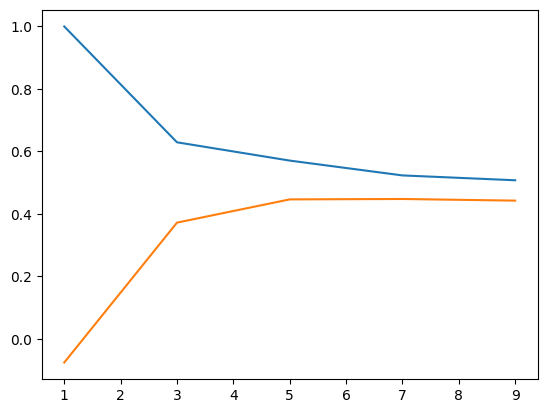

In [30]:
plt.plot(scores_df['neighbors'], scores_df['train_score'])
plt.plot(scores_df['neighbors'], scores_df['test_score'])
plt.show()

In [ ]:
# 모델 평가 / 해석 2
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

final_knn = KNeighborsRegressor(n_neighbors=7)
final_knn.fit(X_train, y_train)

train_predicted_y = final_knn.predict(X_train)
test_predicted_y = final_knn.predict(X_test)

mean_absolute_error(y_train, train_predicted_y), \
    mean_absolute_error(y_test, test_predicted_y), \
    mean_absolute_error(y_train, train_predicted_y) / np.mean(y_train), \
    mean_absolute_error(y_test, test_predicted_y) / np.mean(y_test)



(np.float64(43.20371169615883),
 np.float64(41.75933075933075),
 np.float64(0.2799175652096103),
 np.float64(0.28692576380598656))